<a href="https://colab.research.google.com/github/MarigoldJ/ygl2/blob/main/mycode/modu/study_20210613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download datasets

In [1]:
# Download datasets
! mkdir dataset
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/ThoraricSurgery.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/housing.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/iris.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/pima-indians-diabetes.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/sonar.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/wine.csv


--2021-06-14 11:52:38--  https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/ThoraricSurgery.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21257 (21K) [text/plain]
Saving to: ‘./dataset/ThoraricSurgery.csv’

ThoraricSurgery.csv 100%[===================>]  20.76K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2021-06-14 11:52:38 (36.6 MB/s) - ‘./dataset/ThoraricSurgery.csv’ saved [21257/21257]

--2021-06-14 11:52:38--  https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/housing.csv
Resolving raw.githubusercontent.com

# import packages

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 해본 것

## csv 파일에서 2차원 배열을 불러오는 두가지 방법

In [3]:
d1 = pd.read_csv('./dataset/ThoraricSurgery.csv', header=None)
d2 = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=',')

equal = d1.values == d2
print((equal == False).sum())   # data1에 담긴 values가 곧 data2이다.

0


In [4]:
d1.shape

(470, 18)

# 신경망 만들어서 학습시키기

* 모델 compile 옵션([tensorflow 문서 링크](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile))
    * loss ([문서 링크](https://keras.io/ko/losses/))
        * `mean_absolute_error` : MAE
        * `mean_absolute_percentage_error`
        * `mean_squared_error` : MSE
        * `mean_squared_logarithmic_error`
        * `binary_crossentropy` : choose 1 or 2
        * `categorical_crossentropy`
        * `sparse_categorical_crossentropy`
        * `hinge`
        * `squared_hinge`
        * `categorical_hinge`
        * `kullback_leibler_divergence`
        * `poisson`
        * `logcosh`
        * `cosine_proximity`
    * optimizer
        * `Adam`
        * `RMSprop`
        * `SGD`
        * 그 외에 adamdelta, adagrad, adamax, ftrl, nadam, optimizer가 있음
    * metrics

## binary classification

In [5]:
seed = 77
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
data1 = pd.read_csv('./dataset/ThoraricSurgery.csv', header=None)
x1 = data1.values[:, :17]   # 470 samples, 17 features
y1 = data1.values[:, 17]    # 470 samples, 1 classes

In [7]:
model1 = Sequential()
model1.add(Dense(30, input_dim=17, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# 17 - 30 - 1 Layer

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
print()

model1.fit(x1, y1, epochs=100, batch_size=10) # 470(데이터길이) = 10(배치크기) x 47(개)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/100
47/47 [==============================] - 2s 2ms/step - loss: 0.8333 - accuracy: 0.1617
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.7931 - accuracy: 0.2021
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.4894
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/100
47/47 [

In [8]:
model2 = Sequential()
model2.add(Dense(30, input_dim=17, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
# 17 - 30 - 1 Layer

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model2.summary())
print()

model2.fit(x1, y1, epochs=100, batch_size=10) # 470(데이터길이) = 10(배치크기) x 47(개)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 2.3962 - accuracy: 0.8085
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8426
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.8468
Epoch 6/100
47/47

In [9]:
model3 = Sequential()
model3.add(Dense(30, input_dim=17, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

model3.fit(x1, y1, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.8383
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 11/

In [10]:
# 결과 비교
print(f'model1 accuracy : {model1.evaluate(x1, y1)[1]}')
print(f'model2 accuracy : {model2.evaluate(x1, y1)[1]}')
print(f'model3 accuracy : {model3.evaluate(x1, y1)[1]}')

15/15 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.8511
model1 accuracy : 0.8510638475418091
15/15 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8511
model2 accuracy : 0.8510638475418091
15/15 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.8511
model3 accuracy : 0.8510638475418091


## multi classification

In [52]:
col3 = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data3 = pd.read_csv('./dataset/iris.csv', header=None, names=col3)
x3 = data3.values[:, :4].astype(float)  # 150 samples, 4 features
y3 = data3.values[:, 4]                 # 150 samples, 1 classes

data3

# astype(float)를 하지 않으면, 3.0과 같은 숫자가 3. 과 같이 numpy식으로 표현이 안됨.
# 재확인해보니 3.0은 string, 3.은 float인듯 함.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* target preprocessing
    * string -> int (e.g. `Iris-virginica` -> `2`)
    * int -> one hot code (e.g. `2` -> `0, 0, 1`)

In [46]:
# string -> int
e = LabelEncoder()

Y3 = e.fit_transform(y3)    # fit and transform
# e.fit(y3)
# Y3 = e.transform(y3)
print(Y3[[0, 70, -1]])

# 3종류의 class가 0, 1, 2로 encoding됨

[0 1 2]


In [47]:
# int -> one hot encode
Y3_encoded = to_categorical(Y3)     # 150 samples, 3 targets
print(Y3_encoded[[0, 70, -1]])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [51]:
x3

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [53]:
model4 = Sequential()
model4.add(Dense(16, input_dim=4, activation='relu'))
model4.add(Dense(3, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.fit(x3, Y3_encoded, epochs=50, batch_size=1)

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 1.0767 - accuracy: 0.4933
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.7133
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7867
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.8200
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8133
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8667
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8333
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.9000
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.9200
Epoch 10/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.9067

In [55]:
# 결과 비교
print(f'model4 accuracy : {model4.evaluate(x3, Y3_encoded)[1]}')

5/5 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9600
model4 accuracy : 0.9599999785423279


## 과적합 피하기?

In [63]:
data4 = pd.read_csv('./dataset/sonar.csv', header=None)
x4 = data4.values[:, :60]   # 208 samples, 60 features
y4 = data4.values[:, 60]    # 208 samples, 1 targets

x4 = x4.astype(float)

data4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [58]:
# target preprocessing
e = LabelEncoder()
Y4 = e.fit_transform(y4)

In [64]:
# modeling
model5 = Sequential()
model5.add(Dense(24, input_dim=60, activation='relu'))
model5.add(Dense(10, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model5.fit(x4, Y4, epochs=200, batch_size=5)

Epoch 1/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.5721
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.6202
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.6394
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.6827
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.6490
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.7163
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.7548
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.7260
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.7404
Epoch 11/

# EDA 연습

## csv 파일 불러오기

In [11]:
col2 = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class']
data2 = pd.read_csv('./dataset/pima-indians-diabetes.csv', header=None, names=col2) # header=None 을 빼도됨
data2

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Dataframe 살펴보기

In [12]:
print(data2.head())
print()
print(data2.info())
print()
print(data2.describe())

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-nul

## groupby 활용하기

In [13]:
# pregnant의 값에 따라 class를 확인
print(data2[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))
# as_index = True : 출력되는 Dataframe의 index가 pregnant 행이 됨.
# mean() : pregnant별로 다른 행(class)의 값의 평균을 출력 -> 발병확률로 볼 수 있음

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


## heatmap 그리기

* [cmap(컬러맵) 종류 확인 링크](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
* [색상 팔레트 예제](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)



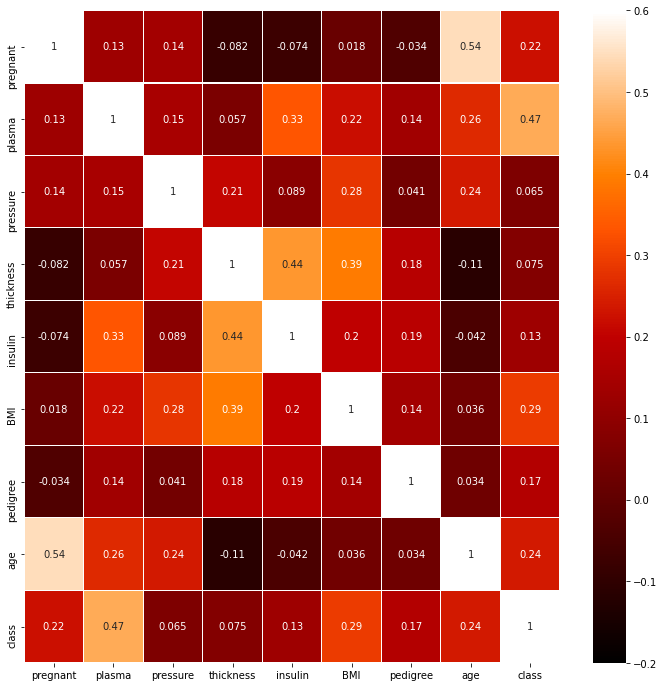

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data2.corr(), linewidths=0.1, linecolor='white',
            vmin=-0.2, vmax=0.6,
            cmap=plt.cm.gist_heat, annot=True)

# linewidths : cell간 구분선의 너비
# linecolor : cell간 구분선의 색깔

# vmax, vmin : 표현 값의 최대 최소 설정, 색에 반영
# center : 중앙값 선정

# cbar : 오른쪽에 색상 바 나타낼지 여부
# cmap : 정해진 팔레트, 색상

# annot : 각 map에 corr 수치를 표시할지 여부


## histogram 그리기

* heatmap에서 class와 상관관계가 가장 큰 plasma를 확인해보자
* plasma와 class의 관계를 다시 확인해보자

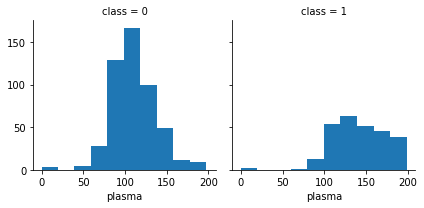

In [15]:
# class에 따라 다른 feature의 histogram을 확인
grid = sns.FacetGrid(data2, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

## 상관도 그래프 그리기

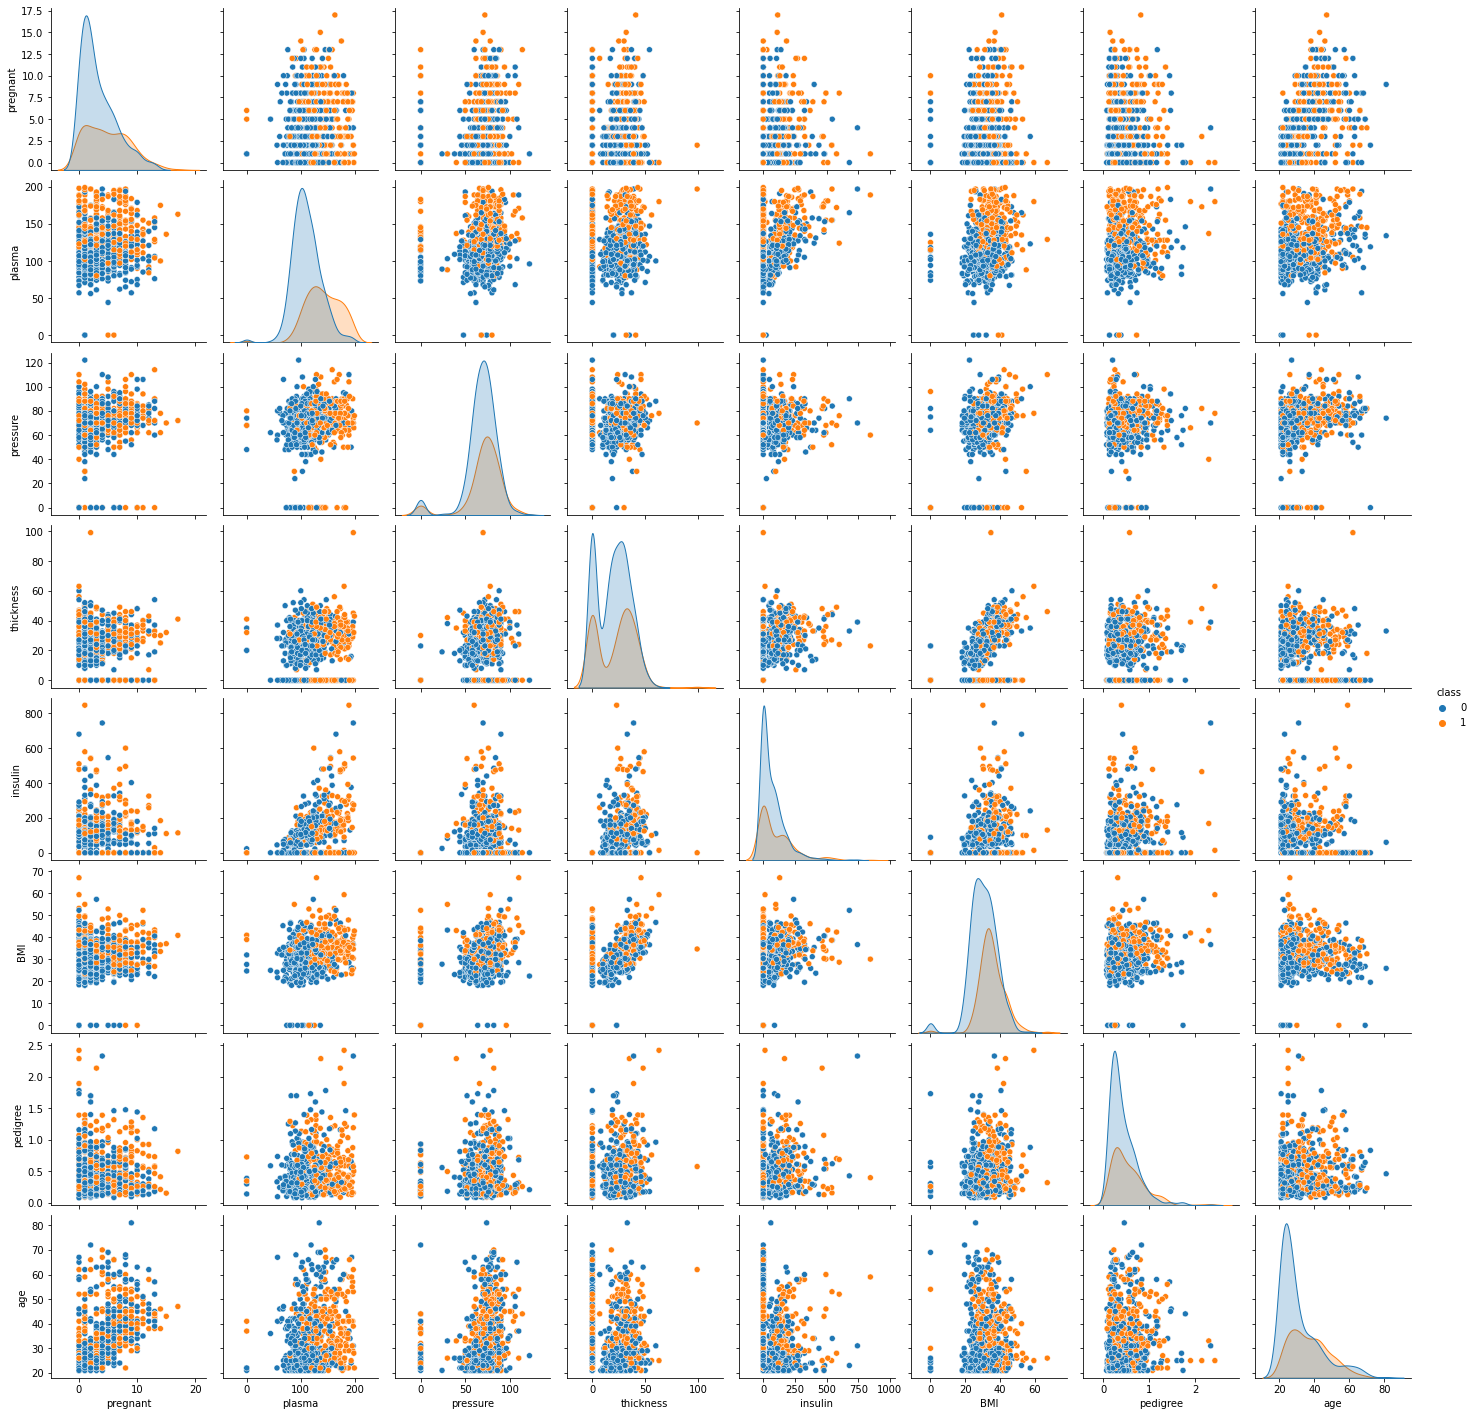

In [19]:
sns.pairplot(data2, hue='class')
plt.show()